<a href="https://colab.research.google.com/github/Apoorvmittal11/23-CS-072-ML-LAB-EXPERIMENT/blob/main/23-CS-072%20EXPERIMENT2/23_CS_072_Experiment_2(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective**
Implement linear regression from scratch using numpy by

(a) solving the normal equation, and

(b) using gradient descent.

Secondly also implement it using scikit-learn’s LinearRegression.
Produce plots that show fit quality, (loss vs iterations), and gradient/ loss-surface visualizations.



In [3]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 2.3 MB/s eta 0:00:00


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from textblob import TextBlob
import re
import string
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **1 Dataset**
california house prediction test.csv
train.csv

In [42]:
train = pd.read_csv('/content/california_housing_train.csv')
test = pd.read_csv('/content/california_housing_test.csv')
train.head()
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


# **2 Tasks**
**A. Data preprocessing**

1) Training- train.csv

2) Validation- test.csv

3) Standardize features (zero mean, unit variance)

4) Add an intercept (bias) column of ones to the design matrix X before computing param-
eters.

In [43]:
# 1. Training- train.csv
X_train = train.drop("median_house_value", axis=1).values
y_train = train["median_house_value"].values.reshape(-1, 1)

# 2. Validation- test.csv
X_test = test.drop("median_house_value", axis=1).values
y_test = test["median_house_value"].values.reshape(-1, 1)

In [44]:
# 3. Standardize features (zero mean, unit variance)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [45]:
# 4. Add intercept (bias) column
X_train_std = np.c_[np.ones((X_train_std.shape[0], 1)), X_train_std]
X_test_std = np.c_[np.ones((X_test_std.shape[0], 1)), X_test_std]

print("X_train_std shape:", X_train_std.shape)
print("X_test_std shape:", X_test_std.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train_std shape: (17000, 9)
X_test_std shape: (3000, 9)
y_train shape: (17000, 1)
y_test shape: (3000, 1)


**B. Implement Normal Equation (closed-form)**

• Derive and implement the solution:

    ˆθ = (X⊤X)−1X⊤y                   where X ∈ Rn×(d+1) has the bias column.

In [46]:
# Normal Equation Implementation

# θ = (X^T X)^(-1) X^T y
theta_normal = np.linalg.pinv(X_train_std.T.dot(X_train_std)).dot(X_train_std.T).dot(y_train)

print("Theta shape:", theta_normal.shape)

# Predictions on validation set
y_pred_normal = X_test_std.dot(theta_normal)

# Evaluate (Mean Squared Error)
from sklearn.metrics import mean_squared_error

mse_normal = mean_squared_error(y_test, y_pred_normal)
print("Normal Equation MSE:", mse_normal)

Theta shape: (9, 1)
Normal Equation MSE: 4867205486.928865


**C. Implement Batch Gradient Descent (iterative)**

1) Implement the mean squared error (MSE) loss:


2) Implement batch gradient descent updates:
θ ← θ − α∇J(θ), ∇J(θ) = 1
n
X⊤(Xθ − y)

3) Support the following hyperparameters: learning rate α, number of iterations, and an
optional early stopping tolerance on change in loss.

4) Track and store training loss at each iteration for plotting.

Gradient Descent MSE: 5149834276.947544


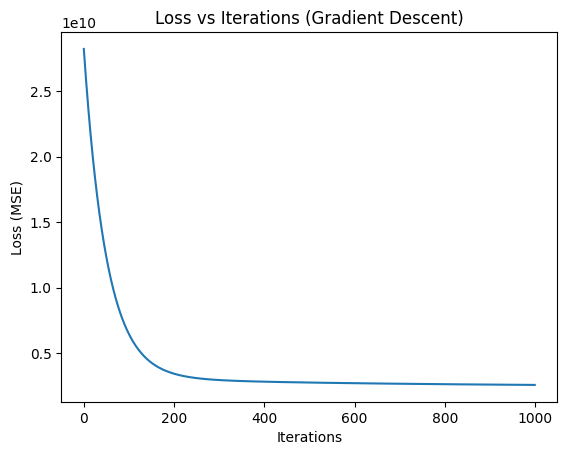

In [14]:
def batch_gradient_descent(X, y, lr=0.01, n_iter=1000, tol=1e-6):

    n, d = X.shape
    theta = np.random.randn(d, 1)  # random initialization
    losses = []

    for i in range(n_iter):
        # Predictions
        y_pred = X.dot(theta)

        # Compute loss (MSE)
        loss = (1/(2*n)) * np.sum((y_pred - y)**2)
        losses.append(loss)

        # Compute gradient
        gradient = (1/n) * X.T.dot(y_pred - y)

        # Update rule
        theta = theta - lr * gradient

        # Early stopping
        if i > 0 and abs(losses[-2] - loss) < tol:
            print(f"Early stopping at iteration {i}")
            break

    return theta, losses

# Run gradient descent
theta_gd, losses = batch_gradient_descent(X_train_std, y_train, lr=0.01, n_iter=1000)

# Predictions on validation set
y_pred_gd = X_test_std.dot(theta_gd)

# Validation MSE
mse_gd = mean_squared_error(y_test, y_pred_gd)
print("Gradient Descent MSE:", mse_gd)

# Plot training loss vs iterations
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Loss vs Iterations (Gradient Descent)")
plt.show()


**E. Comparisons with scikit-learn**

• Fit sklearn.linear model.LinearRegression() on the same training data and compare both the results(the one you did with numpy and the other— scikit-library)

Sklearn LinearRegression MSE: 4867205486.928806

Model Comparison (MSE):
Normal Equation (NumPy): 4867205486.93
Gradient Descent (NumPy): 5149834276.95
scikit-learn LinearRegression: 4867205486.93


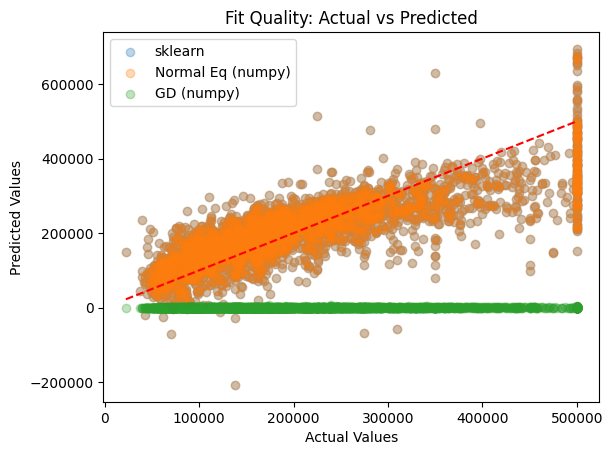

In [58]:
# 1. Fit sklearn LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)   # note: sklearn handles intercept internally

# 2. Predictions
y_pred_sk = linreg.predict(X_test)

# 3. Evaluation (MSE)
mse_sk = mean_squared_error(y_test, y_pred_sk)
print("Sklearn LinearRegression MSE:", mse_sk)

# 4. Comparison of all models
print("\nModel Comparison (MSE):")
print(f"Normal Equation (NumPy): {mse_normal:.2f}")
print(f"Gradient Descent (NumPy): {mse_gd:.2f}")
print(f"scikit-learn LinearRegression: {mse_sk:.2f}")

X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # add bias
y_pred_gd = (X_test_b @ theta_gd).ravel()                # flatten to 1D
# 5. Plot Actual vs Predicted for sklearn
plt.scatter(y_test, y_pred_sk, alpha=0.3, label="sklearn")
plt.scatter(y_test, y_pred_normal, alpha=0.3, label="Normal Eq (numpy)")
plt.scatter(y_test, y_pred_gd,alpha=0.3, label="GD (numpy)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Fit Quality: Actual vs Predicted")
plt.legend()
plt.show()


**F. Visualizations**

Produce clear, labeled figures. Save as PNG/PDF and include in the report.

1) Loss vs iterations: Plot training loss (MSE) against iteration number for gradient
descent. Include curves for different learning rates and for unscaled vs scaled features to
show the effect of scaling.

2) Plot validation loss

3) Gradient/loss surface visualization

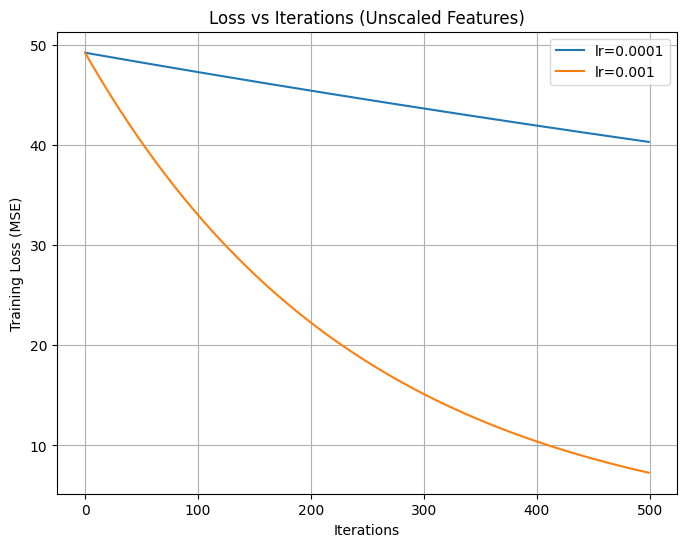

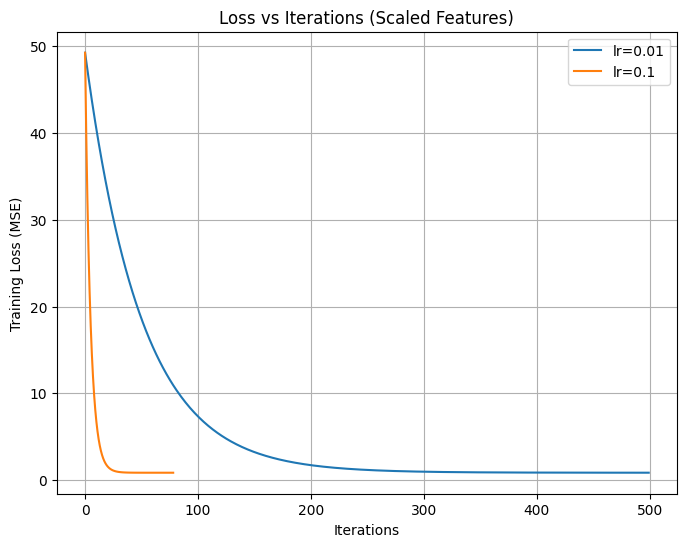

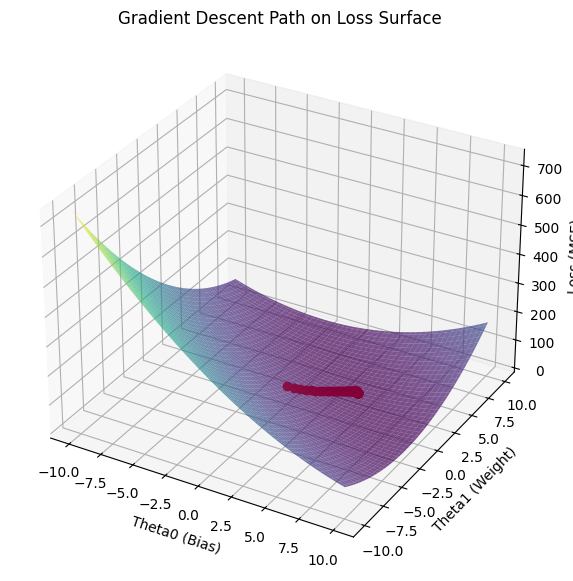

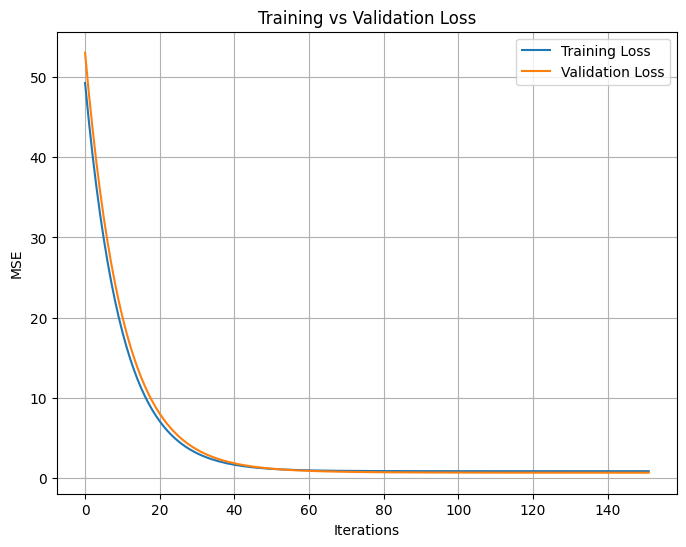

In [22]:
# Mean Squared Error
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent
def gradient_descent(X, y, lr=0.01, n_iters=1000, tol=1e-6):
    n, d = X.shape
    theta = np.zeros(d)
    losses = []
    theta_path = []  # store thetas for visualization

    y = y.reshape(-1)  # ensure y is 1D

    for i in range(n_iters):
        y_pred = X @ theta
        y_pred = y_pred.reshape(-1)  # ensure 1D

        loss = mse_loss(y, y_pred)
        losses.append(loss)
        theta_path.append(theta.copy())

        gradient = (1/n) * (X.T @ (y_pred - y))  # (d,)
        theta = theta - lr * gradient

        if i > 0 and abs(losses[-2] - losses[-1]) < tol:
            break

    return theta, losses, np.array(theta_path)

# Plot Loss vs Iterations
def plot_loss_curves(X, y, lrs, scaled=False):
    plt.figure(figsize=(8, 6))
    for lr in lrs:
        _, losses, _ = gradient_descent(X, y, lr=lr, n_iters=500)
        plt.plot(losses, label=f"lr={lr}")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss (MSE)")
    title = "Loss vs Iterations (Scaled Features)" if scaled else "Loss vs Iterations (Unscaled Features)"
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# 3D Loss Surface Visualization
def plot_loss_surface(X, y, lr=0.05):
    # Only for 1 feature + bias
    if X.shape[1] != 2:
        print("Loss surface visualization works only for 1 feature + bias.")
        return

    # Create meshgrid for theta0 (bias) and theta1
    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-10, 10, 100)
    T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
    losses = np.zeros_like(T0)

    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            theta = np.array([T0[i, j], T1[i, j]])
            y_pred = X @ theta
            losses[i, j] = mse_loss(y, y_pred)

    # Run gradient descent to get path
    _, _, theta_path = gradient_descent(X, y, lr=lr, n_iters=100)

    # 3D Surface
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(T0, T1, losses, cmap="viridis", alpha=0.7)

    # Gradient descent path
    z_path = [mse_loss(y, X @ t) for t in theta_path]
    ax.plot(theta_path[:, 0], theta_path[:, 1], z_path, color="red", marker="o")

    ax.set_xlabel("Theta0 (Bias)")
    ax.set_ylabel("Theta1 (Weight)")
    ax.set_zlabel("Loss (MSE)")
    ax.set_title("Gradient Descent Path on Loss Surface")
    plt.show()

# F.4 Training vs Validation Loss
def plot_validation_loss(X_train, y_train, X_val, y_val, lr=0.01):
    theta, train_losses, theta_path = gradient_descent(X_train, y_train, lr=lr, n_iters=200)

    val_losses = []
    for t in theta_path:
        y_val_pred = X_val @ t
        val_losses.append(mse_loss(y_val, y_val_pred))

    plt.figure(figsize=(8, 6))
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Iterations")
    plt.ylabel("MSE")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(42)
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X.flatten() + np.random.randn(100)

    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Add bias term
    X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
    X_val_bias = np.c_[np.ones(X_val.shape[0]), X_val]

    # Scaled version
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_train_scaled_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
    X_val_scaled_bias = np.c_[np.ones(X_val_scaled.shape[0]), X_val_scaled]

    # Loss Curves
    plot_loss_curves(X_train_bias, y_train, lrs=[0.0001, 0.001], scaled=False)
    plot_loss_curves(X_train_scaled_bias, y_train, lrs=[0.01, 0.1], scaled=True)

    # 3D Visualization
    plot_loss_surface(X_train_bias, y_train, lr=0.05)

    # Validation Loss
    plot_validation_loss(X_train_scaled_bias, y_train, X_val_scaled_bias, y_val, lr=0.05)


**G. Evaluation metrics**

Compute and report these metrics on the test set:

• Mean Squared Error (MSE)

• Root Mean Squared Error (RMSE)

• Coefficient of Determination R2

• Optionally: Mean Absolute Error (MAE)

Compare metrics across the three implementations (normal equation, gradient descent, sklearn).

In [40]:
def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

def normal_equation(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y

def gradient_descent(X, y, lr=0.01, n_iters=1000, tol=1e-6):
    n, m = X.shape
    theta = np.zeros((m, 1))
    y = y.reshape(-1, 1)
    losses = []
    for _ in range(n_iters):
        y_pred = X @ theta
        loss = np.mean((y_pred - y) ** 2)
        losses.append(loss)
        gradient = (1/n) * (X.T @ (y_pred - y))
        theta = theta - lr * gradient
        if len(losses) > 1 and abs(losses[-2] - losses[-1]) < tol:
            break
    return theta

def evaluate_model(y_true, y_pred, name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"\n{name} Evaluation:")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R2:   {r2:.4f}")
    print(f"  MAE:  {mae:.4f}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bias terms
X_train_bias = add_bias(X_train)
X_test_bias = add_bias(X_test)

# Scaled version (for GD)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_bias = add_bias(X_train_scaled)
X_test_scaled_bias = add_bias(X_test_scaled)

# 1) Normal Equation
theta_ne = normal_equation(X_train_bias, y_train)
y_pred_ne = X_test_bias @ theta_ne
evaluate_model(y_test, y_pred_ne, "Normal Equation")

# 2) Gradient Descent
theta_gd = gradient_descent(X_train_scaled_bias, y_train, lr=0.1, n_iters=5000)
y_pred_gd = X_test_scaled_bias @ theta_gd
evaluate_model(y_test, y_pred_gd, "Gradient Descent")

# 3) Scikit-learn
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_sklearn = lin_reg.predict(X_test)
evaluate_model(y_test, y_pred_sklearn, "Sklearn LinearRegression")




Normal Equation Evaluation:
  MSE:  0.5559
  RMSE: 0.7456
  R2:   0.5758
  MAE:  0.5332

Gradient Descent Evaluation:
  MSE:  0.5562
  RMSE: 0.7458
  R2:   0.5755
  MAE:  0.5329

Sklearn LinearRegression Evaluation:
  MSE:  0.5559
  RMSE: 0.7456
  R2:   0.5758
  MAE:  0.5332
